# 1. Load scRNA dataset for hM1

In [1]:
import pandas as pd
import scanpy as sc
import os

In [2]:
# Load the preprocessed sequencing data
data_path =r'L:\Shiwei\DNA_MERFISH_analysis\hM1_10x'

adata = sc.read_h5ad(os.path.join(data_path, r'hM1_10X_labeled.h5ad'))

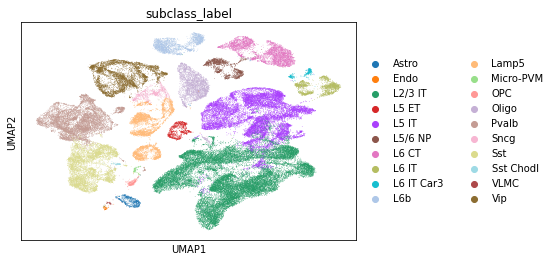

In [3]:
# Plot the UMAP
sc.pl.umap(adata,color='subclass_label')

# 2. Load selected genes for the hM1 MERFISH

In [4]:
library_path = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\hM1_MERFISH'

In [5]:
selected_genes_file1=os.path.join(library_path , 'hM1_selected_genes_from_MTG.csv')
selected_genes_file2=os.path.join(library_path , 'hM1_selected_genes_add_new.csv')

In [6]:
# Load the genes of interest
genes_p1 = pd.read_csv(selected_genes_file1)
genes_p2 = pd.read_csv(selected_genes_file2)

genes_of_interest = list(genes_p1['gene_symbol'])
genes_of_interest.extend(list(genes_p2['gene_symbol']))

print(len(genes_of_interest))

246


In [7]:
# Get the raw data without gene filtering (note the adata.raw from hM1 labeled.h5ad has been partly preprocessed)
#adata_raw = sc.read_h5ad(os.path.join(data_path, r'hM1_10X_raw.h5ad'))

adata_raw = adata.raw.to_adata()

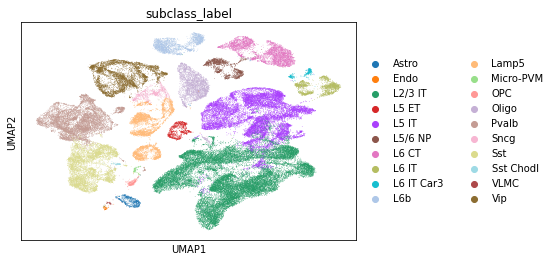

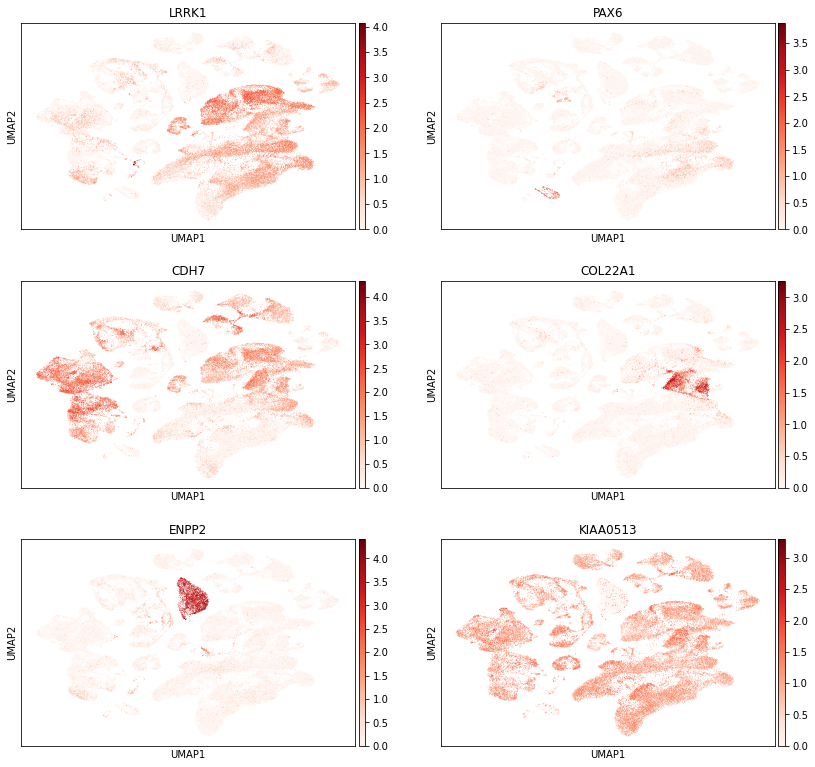

In [8]:
# Plot the expressions of a few random genes of interest
import numpy as np
sc.pl.umap(adata_raw, color='subclass_label', ncols=1)
sc.pl.umap(adata_raw, color=np.random.choice(genes_of_interest, size=6, replace=False), color_map='Reds', ncols=2)

In [34]:
#sc.pl.umap(adata_raw, color=np.random.choice(genes_of_interest, size=10, replace=False), color_map='Reds', ncols=2)

# 3. Calculate the selected gene expression for each cluster (here use leiden)

In [10]:
# Get the cluster labels
cluster_labels = np.unique(np.array(adata_raw.obs['leiden']))
N_clusters = len(cluster_labels)
N_goi = len(genes_of_interest)

In [11]:
# Get the cluster sizes
cluster_sizes = [np.sum(adata_raw.obs['leiden'] == c_l) for c_l in cluster_labels]
cluster_sizes

[5106,
 4756,
 3060,
 2863,
 2753,
 2718,
 2365,
 2310,
 2174,
 2011,
 1682,
 1557,
 4560,
 1517,
 1473,
 1422,
 1397,
 1094,
 831,
 727,
 695,
 614,
 463,
 4539,
 331,
 331,
 290,
 150,
 113,
 67,
 4458,
 4209,
 3617,
 3485,
 3378,
 3286]

In [47]:
# a better way to slice the matrix 
# index each obs using their name in the cluster column and then groupby

cell_exp_mtx = pd.DataFrame(adata_raw.X, index=adata_raw.obs['leiden'], columns=adata_raw.var.index)    
cluster_mean_exp = cell_exp_mtx.groupby(by='leiden').mean()
   
cluster_total_exp = np.sum(cluster_mean_exp, axis=1)
relative_cluster_exp = cluster_mean_exp / np.array(cluster_total_exp)[:, np.newaxis]

# slice the matrix for the selected genes only 
relative_cluster_exp_for_sel_genes = relative_cluster_exp.values[:, adata_raw.var.index.isin(genes_of_interest)]


In [53]:
relative_cluster_exp* 10e6

,WASH7P,LOC105379213,LOC729737,LOC100996442,LOC102725121,LOC102723897,LOC102723917,LOC105379431,LOC100134822,LOC105378947,...,ATP6,COX3,TRNG,ND3,ND4L,ND4,ND5,ND6,CYTB,TRNP
leiden,,,,,,,,,,,,,,,,,,,,,
0,21.422964,1.845894,39.774827,2.640153,0.243991,8.113797,195.652956,9.853624,5.511593,3.089506,...,2586.033661,3598.526819,0.000000,1567.020227,263.138336,3058.690927,1142.757756,34.962336,3095.960419,0.000000
1,21.686801,4.111121,29.718772,2.590658,0.137958,126.407413,145.746953,7.779885,7.105838,2.401474,...,2061.612176,2656.993747,0.000000,1032.731307,139.281910,2021.041728,536.121515,19.232623,2252.656268,0.129544
2,20.771340,1.602258,4.247389,0.942166,0.000000,70.580195,85.907395,3.052069,4.212088,2.360345,...,3115.355503,4072.522279,0.000000,1781.655592,292.943332,3409.083292,1145.140777,50.166464,3239.499347,0.000000
3,20.056025,5.078866,33.961994,3.004095,0.358466,129.855980,167.676772,6.003803,5.814553,3.408722,...,1970.773446,2600.727312,0.211183,906.168862,112.574035,1832.752168,480.372946,17.398436,2144.072641,0.000000
4,19.875017,2.228807,11.607450,0.000000,1.040182,9.083479,198.236739,10.722346,2.432869,1.513497,...,1874.837908,2579.847933,0.000000,969.209796,164.480480,2093.855728,747.418308,26.330381,2208.381629,0.246069
5,20.673492,2.758344,2.792980,1.368029,0.205714,18.095006,127.167477,6.809577,3.723094,3.600987,...,1596.943621,2632.981341,0.000000,827.927215,132.669311,1948.250720,599.422929,21.469989,1966.169075,0.000000
6,18.127688,2.539773,41.509261,3.351195,0.212906,102.278500,137.745456,5.107950,12.631508,2.485836,...,3118.072054,3989.853431,0.165604,1945.242839,321.970620,3072.459949,1018.996263,34.783397,3215.306788,0.000000
7,21.571668,2.448733,41.476151,1.762227,0.000000,8.407824,246.308373,14.970797,5.367594,4.158604,...,1295.447291,2122.919104,0.000000,558.975917,64.986798,1502.631494,440.933982,10.968604,1716.727711,0.000000
8,18.413142,2.924557,42.822389,1.580781,0.000000,7.301918,226.241700,8.625609,6.414019,4.500194,...,2341.190848,3340.889816,0.000000,1267.217303,187.613678,2738.402109,837.088519,22.259769,2766.105172,0.722076


In [57]:
np.log10(400 + 1)

2.603144372620182

In [48]:
cluster_gene_exp = relative_cluster_exp_for_sel_genes * 10e6  # The expression has the unit of count per million
cluster_gene_exp

array([[8.3476990e+02, 2.3399901e+00, 1.1745894e+03, ..., 3.1902024e+03,
        3.8898413e+02, 1.7513448e+03],
       [5.3522102e+01, 1.7561841e+00, 1.3071589e+03, ..., 2.1737828e+02,
        1.1649847e+03, 8.4892230e+02],
       [2.3336328e+02, 1.1464614e+00, 1.8610184e+03, ..., 1.2144816e+03,
        4.1623419e+02, 1.6085710e+03],
       ...,
       [1.9180499e+02, 4.5984287e+00, 2.3618303e+03, ..., 7.2325073e+02,
        1.0444683e+03, 1.0474204e+03],
       [2.2539877e+02, 0.0000000e+00, 5.4106772e+03, ..., 2.5813657e+02,
        1.7842279e+02, 6.9092627e+02],
       [1.5096036e+03, 0.0000000e+00, 1.5521748e+02, ..., 6.0902412e+03,
        1.8578350e+03, 4.3612749e+03]], dtype=float32)

Text(0.5, 0, 'log(expression + 1)')

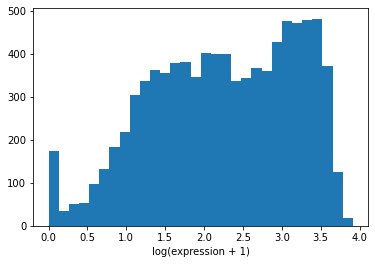

In [49]:
# Plot the distribution of expressions (count per million)
import matplotlib.pyplot as plt
plt.hist(np.log10(cluster_gene_exp.flatten() + 1), bins=30)
plt.xlabel('log(expression + 1)')

# 4. Save result as npz

In [50]:
# Output file
cluster_sizes_file = os.path.join(library_path,'cluster_sizes.npz')
cluster_gene_exp_file = os.path.join(library_path,'cluster_gene_exp.npz')

In [51]:
# Save the expression matrix
np.savez(cluster_gene_exp_file, cluster_gene_exp)
# Save the cluster sizes
np.savez(cluster_sizes_file, cluster_sizes)

# BELOW ARE XINJING"S RESULT FOR MOP MERFISH TO COMPARE   Plot the distribution of expressions (count per million)

Text(0.5, 0, 'log(expression + 1)')

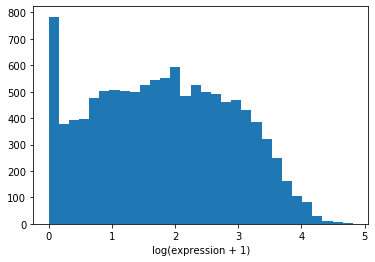

In [33]:

import matplotlib.pyplot as plt
plt.hist(np.log10(cluster_gene_exp.flatten() + 1), bins=30)
plt.xlabel('log(expression + 1)')